In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [23]:
boston = pd.read_csv('Boston.csv')

In [24]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
#So we got a copy of the index labels,We will drop this column with the help of drop() method

boston.drop(columns ='Unnamed: 0',inplace = True)

In [26]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
#checking the shape of the data(The data contains 506 rows and 14 columns)

boston.shape

(506, 14)

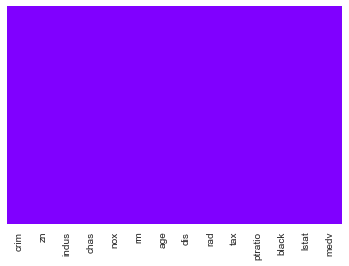

In [28]:
#Now check for the missing values in the data if any

sns.heatmap(boston.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

In [29]:
#No missing values are present in the dataset

In [30]:
#Now check the info of the data 

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [31]:
#Checking the statistics of the data

boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Now doing some exploratory data analysis 

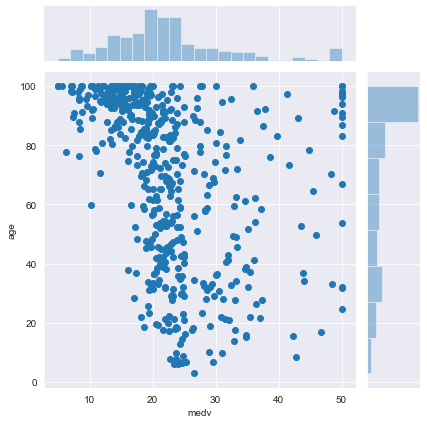

In [32]:
sns.jointplot(x='medv',y='age',data=boston)

### Here the relationship with age doesn't make much sense. Probably it's good to drop this feature

In [33]:
boston.drop('age',axis=1,inplace = True)

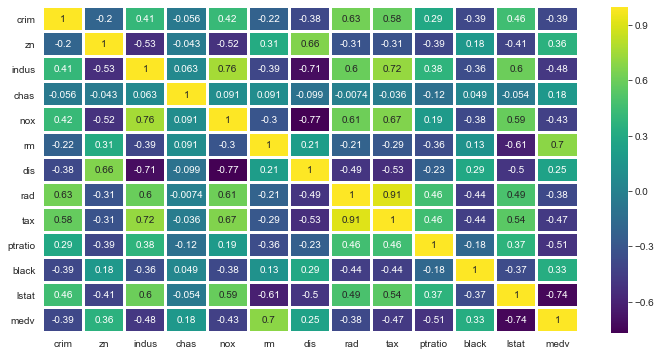

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(boston.corr(),cmap='viridis',linewidth=2,annot=True)

### From the heatmap we can say that the features rm , ptratio and lstat can be a good prediction of medv

### Let's check their relationship with medv

<Figure size 864x432 with 0 Axes>

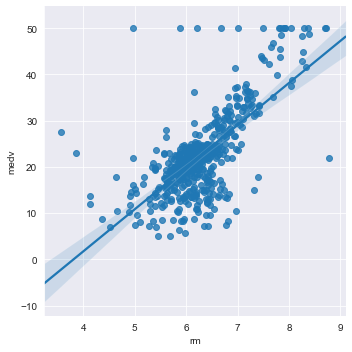

In [40]:
plt.figure(figsize=(12,6))
sns.lmplot(x='rm',y='medv',data=boston)

<Figure size 864x432 with 0 Axes>

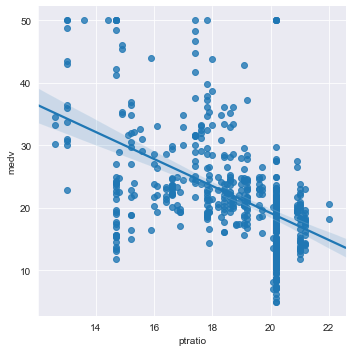

In [42]:
plt.figure(figsize=(12,6))
sns.lmplot(x='ptratio',y='medv',data=boston)

<Figure size 864x432 with 0 Axes>

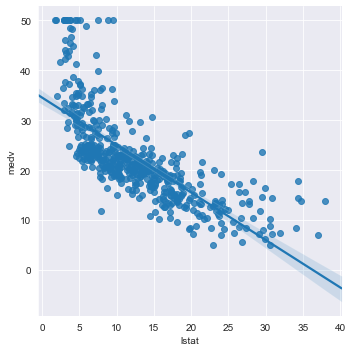

In [43]:
plt.figure(figsize=(12,6))
sns.lmplot(x='lstat',y='medv',data=boston)

### Now making data frames of selected features and target value

In [51]:
X = boston[['rm','ptratio','lstat']]
y = boston['medv']

### Splitting data into training  and testing sets

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Now Creating a multiple linear regression model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linm = LinearRegression()

### Training the model

In [64]:
linm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Printing the model coefficients

In [66]:
pd.DataFrame(linm.coef_,X.columns,columns=['Coefficients'])

,Coefficients
rm,4.054778
ptratio,-0.954047
lstat,-0.589068


### Predicting test data

In [63]:
y_pred = linm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Values')

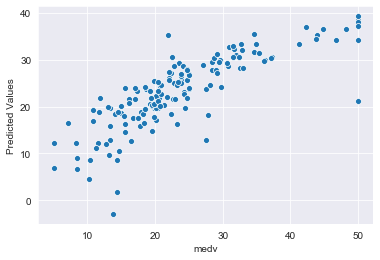

In [68]:
sns.scatterplot(y_test,y_pred)
plt.ylabel('Predicted Values')

### Evaluating the model

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error **

In [70]:
print('Mean Absolute Error',np.mean(abs(y_test-y_pred)))
print('Mean Squared Error',np.mean(abs(y_test-y_pred)**2))
print('Root mean Squared Error',np.sqrt(np.mean(abs(y_test-y_pred)**2)))

Mean Absolute Error 4.097047701719346
Mean Squared Error 33.41851981891349
Root mean Squared Error 5.78087535057741
